In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Predictive-Analytics-and-Data-Exploration-Projects\Datasets\used_cars_train.csv", index_col=0)
test_data = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Predictive-Analytics-and-Data-Exploration-Projects\Datasets\used_cars_test.csv", index_col=0)

In [3]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [5]:
import pandas as pd
from typing import Dict, List, Tuple, Any
import re

def parse_power_data(series: pd.Series) -> Tuple[Dict[str, Any], List[str]]:
    """
    Güç verilerini içeren pandas Series'ini ayrıştırır.
    
    Args:
        series: Güç verilerini içeren pandas Series
        
    Returns:
        Tuple içinde:
        - Ayrıştırılmış verileri içeren sözlük
        - Eksik birim içeren kayıtların listesi
    """
    parsed_data = {
        'values': [],
        'units': [],
        'errors': []
    }
    missing_units = []
    
    for idx, item in enumerate(series):
        try:
            # Boş veya NaN değerleri kontrol et
            if pd.isna(item) or str(item).strip() == '':
                parsed_data['errors'].append(f"Satır {idx}: Boş değer")
                continue
                
            # Veriyi parçalara ayır
            parts = str(item).strip().split()
            
            # Sayısal değeri ayrıştır
            if len(parts) >= 1:
                try:
                    value = float(parts[0])
                    parsed_data['values'].append(value)
                except ValueError:
                    parsed_data['errors'].append(f"Satır {idx}: Geçersiz sayısal değer - {parts[0]}")
                    continue
            else:
                parsed_data['errors'].append(f"Satır {idx}: Eksik değer")
                continue
            
            # Birimi ayrıştır
            if len(parts) >= 2:
                unit = parts[1]
                parsed_data['units'].append(unit)
            else:
                parsed_data['units'].append('No Unit')
                missing_units.append(f"Satır {idx}: {item}")
                
        except Exception as e:
            parsed_data['errors'].append(f"Satır {idx}: Beklenmeyen hata - {str(e)}")
    
    return parsed_data, missing_units

def detailed_analysis(parsed_data: Dict[str, Any], missing_units: List[str]) -> Dict[str, Any]:
    """
    Ayrıştırılmış güç verilerinin detaylı analizini gerçekleştirir.
    
    Args:
        parsed_data: parse_power_data fonksiyonundan dönen ayrıştırılmış veriler
        missing_units: Eksik birim içeren kayıtların listesi
        
    Returns:
        Analiz sonuçlarını içeren sözlük
    """
    analysis_results = {
        'numeric_analysis': {},
        'error_analysis': {},
        'unit_analysis': {}
    }
    
    # Sayısal Analiz
    values = parsed_data['values']
    if values:
        analysis_results['numeric_analysis'] = {
            'count': len(values),
            'unique_values': len(set(values)),
            'min_value': min(values),
            'max_value': max(values),
            'mean_value': sum(values) / len(values)
        }
    
    # Hata Analizi
    errors = parsed_data['errors']
    error_types = {}
    for error in errors:
        error_type = error.split(':')[1].split('-')[0].strip()
        error_types[error_type] = error_types.get(error_type, 0) + 1
    
    analysis_results['error_analysis'] = {
        'total_errors': len(errors),
        'error_distribution': error_types
    }
    
    # Birim Analizi
    units = parsed_data['units']
    unit_distribution = {}
    for unit in units:
        unit_distribution[unit] = unit_distribution.get(unit, 0) + 1
    
    analysis_results['unit_analysis'] = {
        'unit_distribution': unit_distribution,
        'missing_units': missing_units,
        'total_missing_units': len(missing_units)
    }
    
    return analysis_results

def print_analysis_results(results: Dict[str, Any]):
    """
    Analiz sonuçlarını okunaklı bir formatta yazdırır.
    
    Args:
        results: detailed_analysis fonksiyonundan dönen sonuçlar
    """
    print("\n=== Güç Verisi Analiz Sonuçları ===\n")
    
    print("1. Sayısal Analiz:")
    for key, value in results['numeric_analysis'].items():
        print(f"  - {key}: {value}")
    
    print("\n2. Hata Analizi:")
    print(f"  Toplam Hata Sayısı: {results['error_analysis']['total_errors']}")
    print("  Hata Dağılımı:")
    for error_type, count in results['error_analysis']['error_distribution'].items():
        print(f"    - {error_type}: {count}")
    
    print("\n3. Birim Analizi:")
    print("  Birim Dağılımı:")
    for unit, count in results['unit_analysis']['unit_distribution'].items():
        print(f"    - {unit}: {count}")
    print(f"\n  Eksik Birim Sayısı: {results['unit_analysis']['total_missing_units']}")
    if results['unit_analysis']['missing_units']:
        print("  Eksik Birim İçeren Kayıtlar:")
        for record in results['unit_analysis']['missing_units']:
            print(f"    - {record}")

In [6]:
# parsed_data["errors"]

In [7]:
# Analizi gerçekleştir
parsed_results, missing_units = parse_power_data(train_data["Mileage"])
analysis_results = detailed_analysis(parsed_results, missing_units)
print_analysis_results(analysis_results)


=== Güç Verisi Analiz Sonuçları ===

1. Sayısal Analiz:
  - count: 6017
  - unique_values: 430
  - min_value: 0.0
  - max_value: 33.54
  - mean_value: 18.134960943992073

2. Hata Analizi:
  Toplam Hata Sayısı: 2
  Hata Dağılımı:
    - Boş değer: 2

3. Birim Analizi:
  Birim Dağılımı:
    - km/kg: 66
    - kmpl: 5951

  Eksik Birim Sayısı: 0


In [8]:
import numpy as np
import pandas as pd

def convert_mileage(series):
    """
    Convert a series of motor power values to clean floating point numbers.
    If the value is in 'km/kg', the numeric value will be multiplied by 0.75.

    Steps:
    1. Convert all values to strings.
    2. Convert to lowercase.
    3. Identify and remove 'km/kg' or 'kmpl' text.
    4. Remove leading/trailing whitespace.
    5. Convert to float.
    6. If the original string contained 'km/kg', multiply the value by 0.75.
    7. Replace '0' values with NaN.

    Args:
        series (pd.Series): Series containing mileage values as strings.

    Returns:
        pd.Series: Cleaned mileage values as floats.
    """
    # Step 1: Convert all values to strings
    string_series = series.astype(str)
    
    # Step 2: Convert to lowercase
    lowercase_series = string_series.str.lower()
    
    # Identify rows that contain 'km/kg'
    is_kg = lowercase_series.str.contains('km/kg')
    
    # Step 3: Remove 'km/kg' or 'kmpl' text
    cleaned_series = lowercase_series.str.replace('km/kg', '', regex=False)
    cleaned_series = cleaned_series.str.replace('kmpl', '', regex=False)
    
    # Step 4: Remove leading/trailing whitespace
    cleaned_series = cleaned_series.str.strip()
    
    # Step 5: Convert to float
    float_series = pd.to_numeric(cleaned_series, errors='coerce')
    
    # Step 6: If the unit was 'km/kg', multiply by 0.75
    float_series.loc[is_kg] = float_series.loc[is_kg] * 0.75
    
    # Step 7: Replace 0 values with NaN
    float_series.replace(0, np.nan, inplace=True)
    
    return float_series


In [9]:
train_data['Mileage'] = convert_mileage(train_data['Mileage'])
test_data['Mileage'] = convert_mileage(test_data['Mileage'])

In [10]:
train_data['Mileage'].isnull().sum()

70

In [11]:
train_data['Mileage'] = train_data['Mileage'].fillna(train_data['Mileage'].median())
test_data['Mileage'] = test_data['Mileage'].fillna(test_data['Mileage'].median())

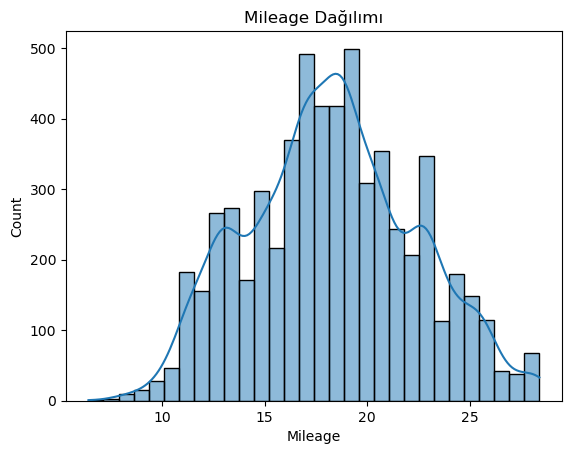

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['Mileage'], bins=30, kde=True)
plt.title("Mileage Dağılımı")
plt.show()

In [13]:
train_data['Mileage'].isnull().sum()

0

In [14]:
# Analizi gerçekleştir
parsed_results, missing_units = parse_power_data(train_data["Engine"])
analysis_results = detailed_analysis(parsed_results, missing_units)
print_analysis_results(analysis_results)


=== Güç Verisi Analiz Sonuçları ===

1. Sayısal Analiz:
  - count: 5983
  - unique_values: 146
  - min_value: 72.0
  - max_value: 5998.0
  - mean_value: 1621.276449941501

2. Hata Analizi:
  Toplam Hata Sayısı: 36
  Hata Dağılımı:
    - Boş değer: 36

3. Birim Analizi:
  Birim Dağılımı:
    - CC: 5983

  Eksik Birim Sayısı: 0


In [15]:
import pandas as pd
import numpy as np

def convert_engine(series):
    """
    Steps:
    1. Convert all values to strings
    2. Convert to lowercase
    3. Remove 'CC' text
    4. Remove leading/trailing whitespace
    5. Convert to float

    Args:
        series (pd.Series): Series containing motor power values as strings

    Returns:
        pd.Series: Cleaned motor power values as floats
    """
    # Step 1: Convert all values to strings
    string_series = series.astype(str)

    # Step 2: Convert to lowercase
    lowercase_series = string_series.str.lower()

    # Step 3: Remove 'cc' text
    no_cc_series = lowercase_series.str.replace("cc", "", regex=False)

    # Step 4: Remove leading/trailing whitespace
    stripped_series = no_cc_series.str.strip()

    # Step 5: Convert to float using pd.to_numeric (non-convertible values become NaN)
    float_series = pd.to_numeric(stripped_series, errors='coerce')

    return float_series


In [16]:
train_data['Engine'] = convert_engine(train_data['Engine'])
test_data['Engine'] = convert_engine(test_data['Engine'])

In [17]:
train_data['Engine'].isnull().sum()

36

In [18]:
train_data['Engine'] = train_data['Engine'].fillna(train_data['Engine'].median())
test_data['Engine'] = test_data['Engine'].fillna(test_data['Engine'].median())

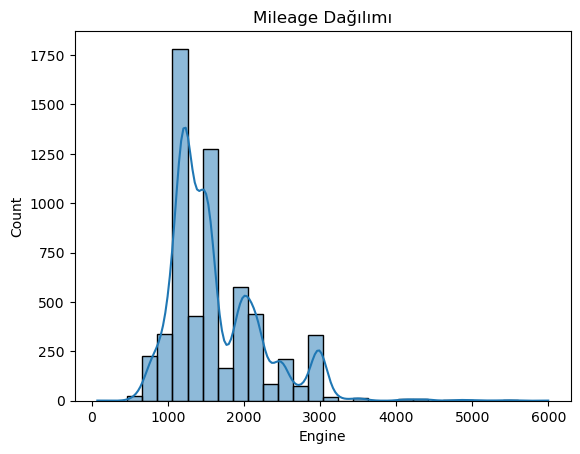

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['Engine'], bins=30, kde=True)
plt.title("Mileage Dağılımı")
plt.show()

In [20]:
train_data['Engine'].isnull().sum()

0

In [21]:
# Analizi gerçekleştir
parsed_results, missing_units = parse_power_data(train_data["Power"])
analysis_results = detailed_analysis(parsed_results, missing_units)
print_analysis_results(analysis_results)


=== Güç Verisi Analiz Sonuçları ===

1. Sayısal Analiz:
  - count: 5876
  - unique_values: 369
  - min_value: 34.2
  - max_value: 560.0
  - mean_value: 113.25304969366827

2. Hata Analizi:
  Toplam Hata Sayısı: 143
  Hata Dağılımı:
    - Geçersiz sayısal değer: 107
    - Boş değer: 36

3. Birim Analizi:
  Birim Dağılımı:
    - bhp: 5876

  Eksik Birim Sayısı: 0


In [22]:
#parsed_results["errors"]

In [23]:
import pandas as pd
import numpy as np

def convert_motor_power(series):
    """
    Convert a series of motor power values (in BHP) to clean floating point numbers.
    
    Steps:
    1. Convert all values to strings
    2. Convert to lowercase
    3. Remove 'bhp' text
    4. Remove leading/trailing whitespace
    5. Replace empty or null values with NaN
    6. Convert to float
    
    Args:
        series (pd.Series): Series containing motor power values as strings
    
    Returns:
        pd.Series: Cleaned motor power values as floats
    """
    # Step 1: Convert all values to strings
    string_series = series.astype(str)
    
    # Step 2: Convert to lowercase
    lowercase_series = string_series.str.lower()
    
    # Step 3: Remove 'bhp' text
    no_bhp_series = lowercase_series.str.replace("bhp", "", regex=False)
    
    # Step 4: Remove leading/trailing whitespace
    stripped_series = no_bhp_series.str.strip()
    
    # Step 5: Replace empty or null values with NaN
    clean_series = stripped_series.replace(["null", "null bhp", ""], np.nan)
    
    # Step 6: Convert to float (ignore errors to handle non-numeric values)
    float_series = clean_series.astype(float, errors="ignore")
    
    return float_series

In [24]:
train_data['Power'] = convert_motor_power(train_data['Power'])
test_data['Power'] = convert_motor_power(test_data['Power'])

In [25]:
train_data['Power'].isnull().sum()

143

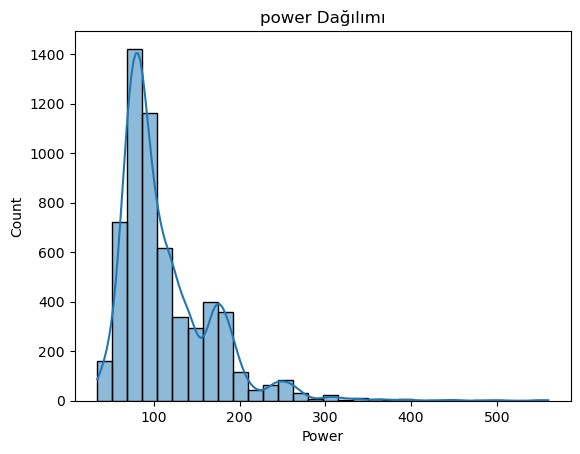

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['Power'], bins=30, kde=True)
plt.title("power Dağılımı")
plt.show()

In [27]:
train_data['Power'] = train_data['Power'].fillna(train_data['Power'].median())
test_data['Power'] = test_data['Power'].fillna(test_data['Power'].median())

In [28]:
train_data['Power'].isnull().sum()

0

In [29]:
# Analizi gerçekleştir
parsed_results, missing_units = parse_power_data(train_data["New_Price"])
analysis_results = detailed_analysis(parsed_results, missing_units)
print_analysis_results(analysis_results)


=== Güç Verisi Analiz Sonuçları ===

1. Sayısal Analiz:
  - count: 824
  - unique_values: 540
  - min_value: 1.0
  - max_value: 99.92
  - mean_value: 20.320716019417485

2. Hata Analizi:
  Toplam Hata Sayısı: 5195
  Hata Dağılımı:
    - Boş değer: 5195

3. Birim Analizi:
  Birim Dağılımı:
    - Lakh: 807
    - Cr: 17

  Eksik Birim Sayısı: 0


In [30]:
import numpy as np
import pandas as pd

def convert_to_lakh(series):
    """
    Convert a Pandas Series containing 'lakh' and 'cr' values into a standardized 'lakh' format.
    
    Steps:
    1. Convert all values to strings.
    2. Convert to lowercase.
    3. Identify and extract numeric values and units ('cr' or 'lakh').
    4. Convert 'cr' values to lakh by multiplying by 100.
    5. Convert 'lakh' values directly to float.
    6. Replace invalid values with NaN.

    Args:
        series (pd.Series): Series containing numeric values with 'cr' or 'lakh'.

    Returns:
        pd.Series: Cleaned values converted to lakh as floats.
    """
    # Step 1: Convert all values to strings
    string_series = series.astype(str)

    # Step 2: Convert to lowercase
    lowercase_series = string_series.str.lower()

    # Identify rows that contain 'cr' (crore)
    is_cr = lowercase_series.str.contains('cr', regex=False)

    # Step 3: Remove 'cr' or 'lakh' text
    cleaned_series = lowercase_series.str.replace('cr', '', regex=False)
    cleaned_series = cleaned_series.str.replace('lakh', '', regex=False)

    # Step 4: Remove leading/trailing whitespace
    cleaned_series = cleaned_series.str.strip()

    # Step 5: Convert to float
    float_series = pd.to_numeric(cleaned_series, errors='coerce')

    # Step 6: If the unit was 'cr', multiply by 100
    float_series.loc[is_cr] = float_series.loc[is_cr] * 100

    # Step 7: Replace invalid values with NaN
    return float_series

In [31]:
train_data['New_Price'] = convert_to_lakh(train_data['New_Price'])
test_data['New_Price'] = convert_to_lakh(test_data['New_Price'])

In [32]:
train_data['Price_Log'] = np.log1p(train_data['Price'])

In [33]:
train_data['New_Price_Log'] = np.log1p(train_data['New_Price'])
test_data['New_Price_Log'] = np.log1p(test_data['New_Price'])

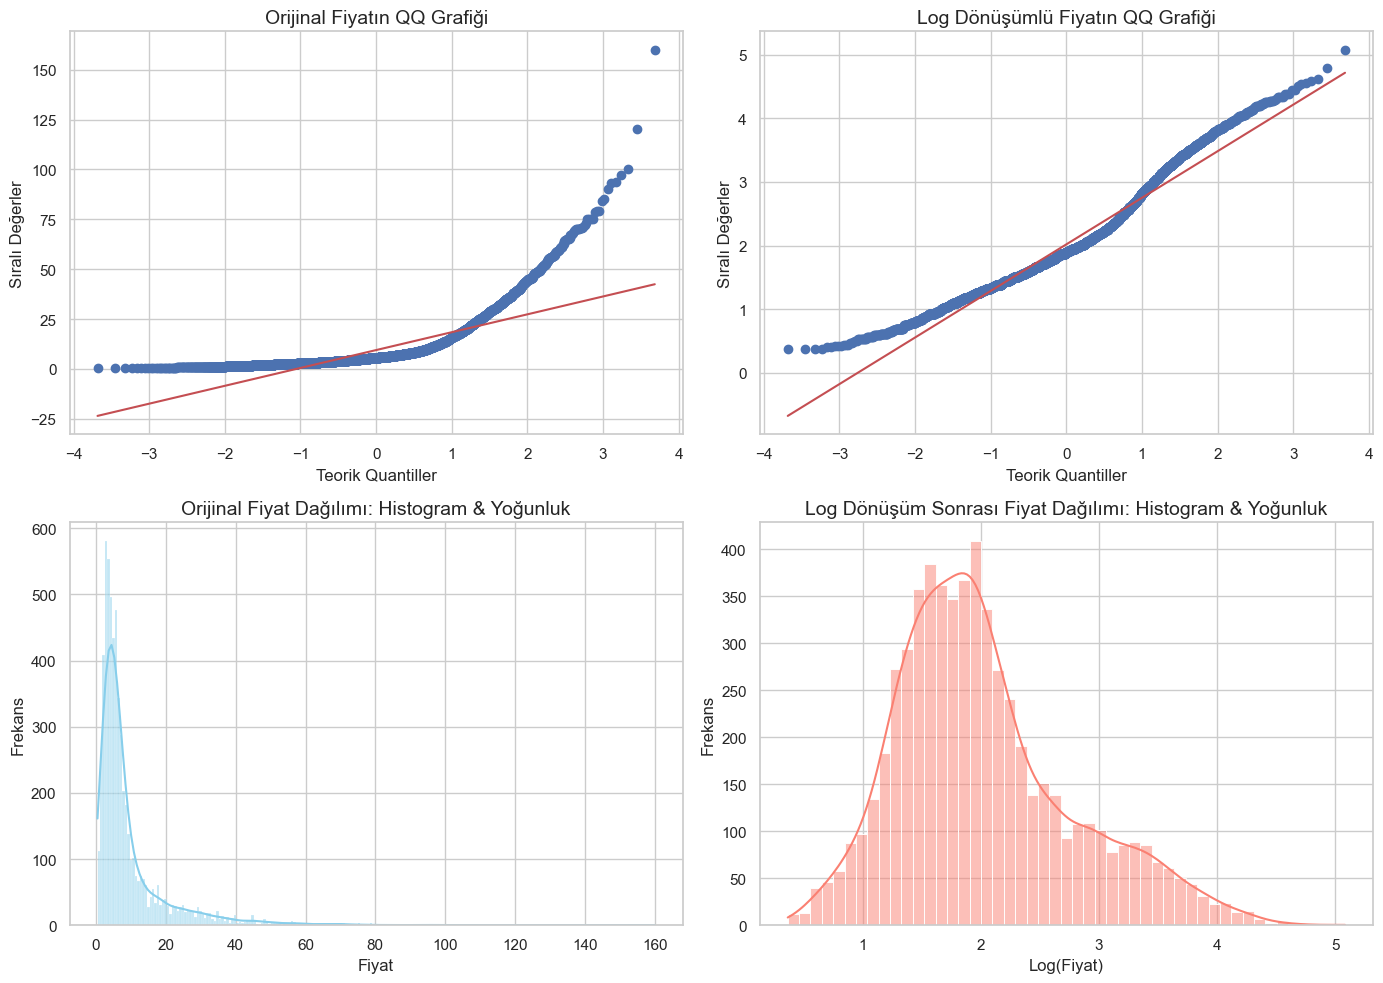

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Seaborn stilini belirleyelim
sns.set_theme(style="whitegrid")

# 2x2'lik bir grid oluşturuyoruz: Üst sırada QQ plotlar, alt sırada histogram & yoğunluk grafikleri
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- ORİJİNAL VERİ (Price) ---
# 1. QQ Plot: Orijinal Fiyatın teorik dağılımla karşılaştırılması
stats.probplot(train_data['Price'], plot=axes[0, 0])
axes[0, 0].set_title("Orijinal Fiyatın QQ Grafiği", fontsize=14)
axes[0, 0].set_xlabel("Teorik Quantiller", fontsize=12)
axes[0, 0].set_ylabel("Sıralı Değerler", fontsize=12)

# 2. Histogram & Yoğunluk Eğrisi: Orijinal Fiyat dağılımı
sns.histplot(train_data['Price'], kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("Orijinal Fiyat Dağılımı: Histogram & Yoğunluk", fontsize=14)
axes[1, 0].set_xlabel("Fiyat", fontsize=12)
axes[1, 0].set_ylabel("Frekans", fontsize=12)

# --- LOG DÖNÜŞÜMLÜ VERİ (Price_Log) ---
# 3. QQ Plot: Log dönüşümlü fiyatın teorik dağılımla karşılaştırılması
stats.probplot(train_data['Price_Log'], plot=axes[0, 1])
axes[0, 1].set_title("Log Dönüşümlü Fiyatın QQ Grafiği", fontsize=14)
axes[0, 1].set_xlabel("Teorik Quantiller", fontsize=12)
axes[0, 1].set_ylabel("Sıralı Değerler", fontsize=12)

# 4. Histogram & Yoğunluk Eğrisi: Log dönüşüm sonrası fiyat dağılımı
sns.histplot(train_data['Price_Log'], kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Log Dönüşüm Sonrası Fiyat Dağılımı: Histogram & Yoğunluk", fontsize=14)
axes[1, 1].set_xlabel("Log(Fiyat)", fontsize=12)
axes[1, 1].set_ylabel("Frekans", fontsize=12)

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'New_Price'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Price_Log'}>],
       [<Axes: title={'center': 'New_Price_Log'}>, <Axes: >, <Axes: >]],
      dtype=object)

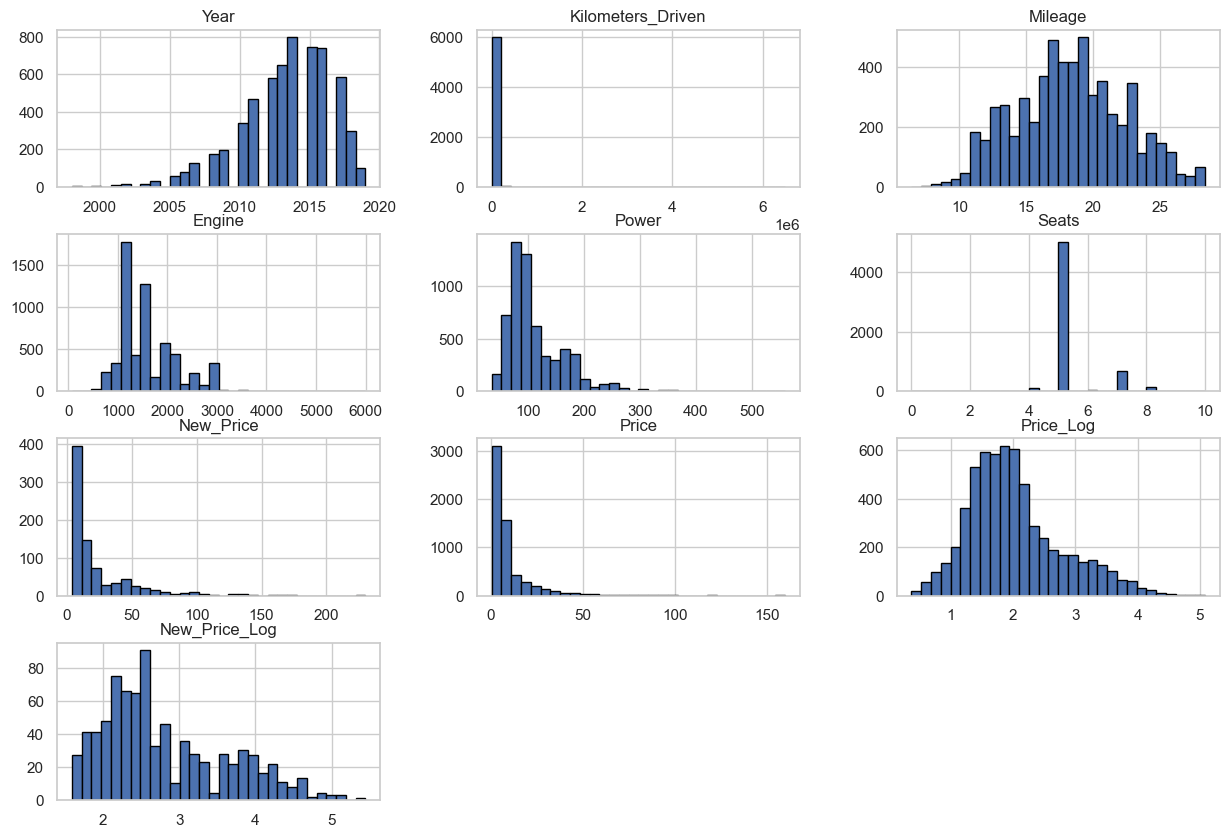

In [35]:
train_data.hist(bins=30, figsize=(15, 10), edgecolor="black")

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
 13  Price_Log          6019 non-null   float64
 14  New_Price_Log      824 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 752.4+ KB


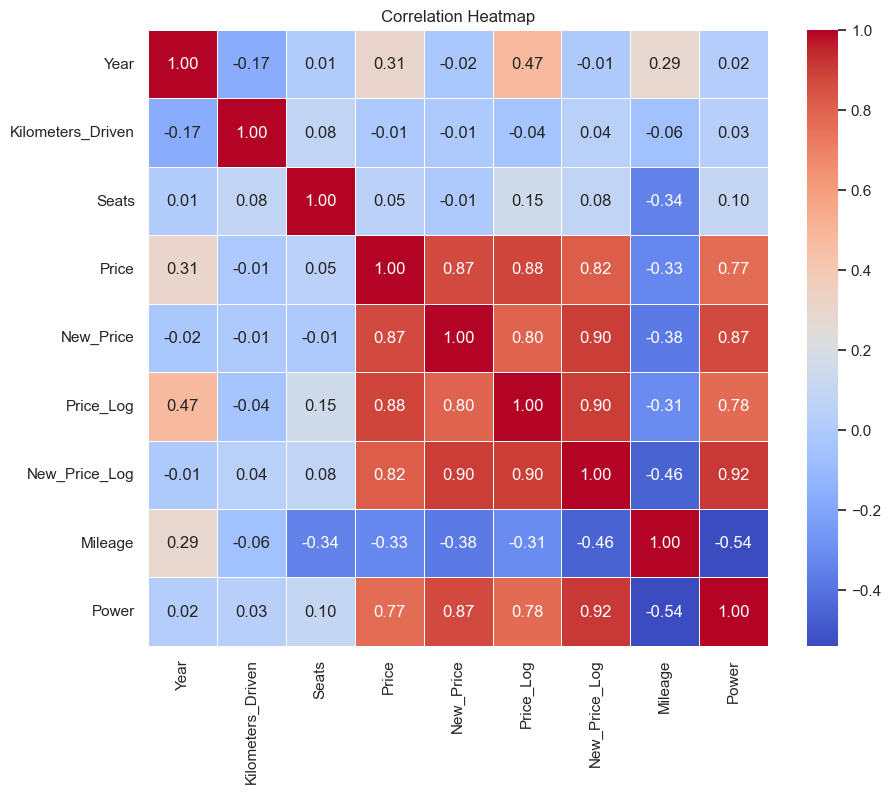

In [37]:
train_numeric_columns = train_data[['Year',  'Kilometers_Driven',  'Seats',  'Price', 'New_Price', 'Price_Log', 'New_Price_Log', 'Mileage', "Power"]]

correlation_matrix_pearson = train_numeric_columns.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def impute_and_predict_target(data, features, target):
    """
    Eksik verileri medyan yöntemiyle doldurur ve
    hedef sütunundaki (target) eksik değerleri, 
    verilen özellikler (features) ile eğitilen doğrusal regresyon
    modeli kullanarak tahmin eder.
    
    Args:
        data: İşlenecek veri kümesi.
        features: Modelde kullanılacak özellik sütunları (örn: ['Power', 'Engine', 'Mileage']).
        target: Tahmin edilecek hedef sütun (örn: 'New_Price').
    
    Returns:
        Eksik değerleri tamamlanmış veri kümesi.
    """
    # Veri kümesinin kopyasını oluşturarak orijinal veriyi koruruz
    data = data.copy()
    
    # =============================================
    # 1. Gelişmiş Veri Tamamlama
    # =============================================
    for col in features:
        data[col] = data[col].fillna(data[col].median())
    
    # =============================================
    # 2. Veri Hazırlığı & Özellik Mühendisliği
    # =============================================
    train_mask = data[target].notna()
    train_features = data.loc[train_mask, features]
    train_target = data.loc[train_mask, target]
    
    predict_mask = data[target].isna()
    predict_features = data.loc[predict_mask, features]
    
    # =============================================
    # 3. Veri Normalizasyonu
    # =============================================
    scaler = StandardScaler()
    scaled_train_features = scaler.fit_transform(train_features)
    scaled_predict_features = scaler.transform(predict_features)
    
    # =============================================
    # 4. Model Eğitimi
    # =============================================
    model = LinearRegression()
    model.fit(scaled_train_features, train_target)
    
    # =============================================
    # 5. Tahmin ve İmputation
    # =============================================
    if predict_features.shape[0] > 0:
        data.loc[predict_mask, target] = model.predict(scaled_predict_features)
    
    return data

In [39]:
train_data = impute_and_predict_target(train_data,  ['Price_Log',  'Power', 'Mileage'], 'New_Price_Log')
test_data = impute_and_predict_target(test_data,  ['Power', 'Mileage'], 'New_Price_Log')

In [40]:
train_data = impute_and_predict_target(train_data,  ['Price',  'Power', 'Mileage'], 'New_Price')
test_data = impute_and_predict_target(test_data,  ['Power', 'Mileage'], 'New_Price')

In [41]:
train_data['New_Price_Log'].isnull().sum()

0

In [42]:
test_data['New_Price_Log'].isnull().sum()

0

In [43]:
train_data["Seats"].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [44]:
train_data["Seats"] = train_data["Seats"].fillna(5.0)
test_data["Seats"] = test_data["Seats"].fillna(5.0)

In [45]:
train_data["Seats"].isnull().sum()

0

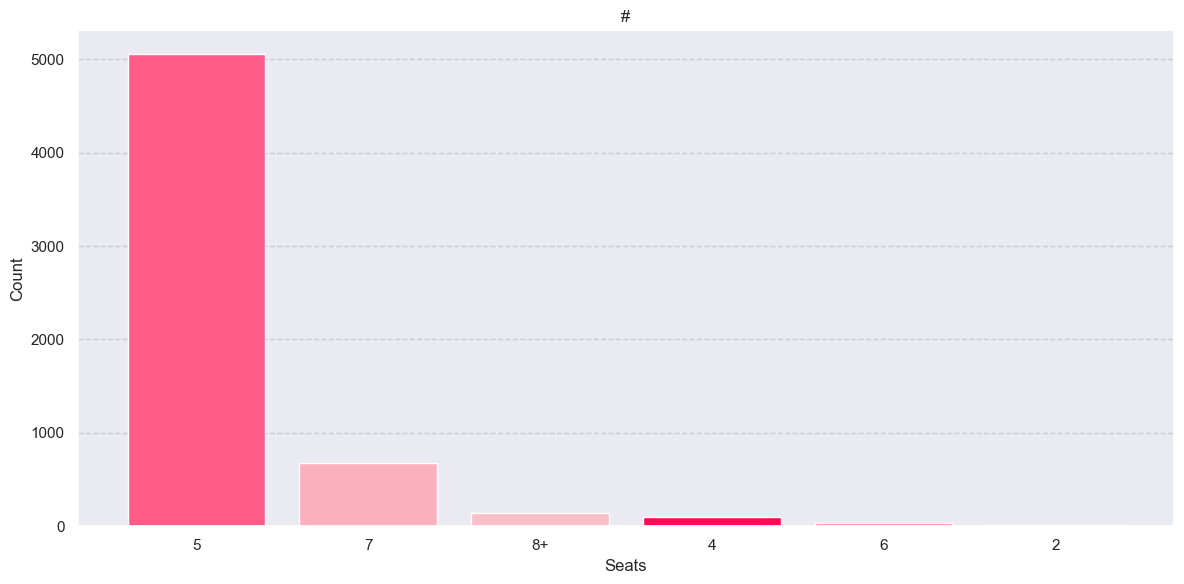

Frekans Tablosu:


,Seats,Count
0,5,5057
1,7,674
2,8+,142
3,4,99
4,6,31
5,2,16


In [46]:
# ----------------------
# DEĞİŞKENLERİ AYARLA (Özelleştirin)
# ----------------------
column_name = "Seats"  # Analiz edilecek sütun
title = "#"  # Grafik başlığı
palette = {'2': '#ff0a54', '4': '#ff0a54', '5': '#ff5c8a', '6' : '#ff85a1', '7': '#fbb1bd', '8+': '#f9bec7'}  # Güncellenmiş renk paleti
edge_color = "white"  # Çubuk kenarlık rengi
figsize = (12, 6)  # Grafik boyutu
grid_style = {"axis": "y", "linestyle": "--", "alpha": 0.3, "color": "gray"}
# ----------------------

# Hafta sonu/içi etiketlemesi yap
train_data[column_name] = train_data[column_name].map({2.0: '2', 4.0: '4', 5.0: '5', 6.0: '6', 7.0: '7', 8.0: '8+', 9.0 : '8+',  10.0 : '8+', 0.0 : '5'})

# Grafik stilini ve boyutunu ayarla
sns.set(style="dark")
plt.figure(figsize=figsize)

# 1. Sütunun frekanslarını hesapla
value_counts = (
    train_data[column_name]
    .value_counts()
    .rename_axis(column_name)
    .reset_index(name="Count")
)

# 3. Çubuk grafik oluştur (Palet renklerini kullan)
# Her bir değer için renkleri belirle
bar_colors = [palette[val] for val in value_counts[column_name]]  # Güncellenmiş renk ataması

plt.bar(
    value_counts[column_name], 
    value_counts["Count"], 
    color=bar_colors,
    edgecolor=edge_color
)

plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(title)

# 4. Grid çizgilerini ekle
plt.grid(**grid_style)

# 5. Grafiği göster
plt.tight_layout()
plt.show()

# Frekansları konsola yazdır
print("Frekans Tablosu:")
value_counts

In [47]:
train_data['Seats'] = pd.Categorical(train_data['Seats'], categories=['2', '4', '5', '6', '7', '8+'], ordered=True)

test_data[column_name] = test_data[column_name].map({2.0: '2', 4.0: '4', 5.0: '5', 6.0: '6', 7.0: '7', 8.0: '8+', 9.0 : '8+',  10.0 : '8+', 0.0 : '5'})
test_data['Seats'] = pd.Categorical(test_data['Seats'], categories=['2', '4', '5', '6', '7', '8+'], ordered=True)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   object  
 5   Transmission       6019 non-null   object  
 6   Owner_Type         6019 non-null   object  
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   category
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Price_Log          6019 non-null   float64 
 14  New_Price_Log      6019 non-null   float64 
dtypes: category(1), float64(7), int64(2), object(5)
memory usage

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               1234 non-null   object  
 1   Location           1234 non-null   object  
 2   Year               1234 non-null   int64   
 3   Kilometers_Driven  1234 non-null   int64   
 4   Fuel_Type          1234 non-null   object  
 5   Transmission       1234 non-null   object  
 6   Owner_Type         1234 non-null   object  
 7   Mileage            1234 non-null   float64 
 8   Engine             1234 non-null   float64 
 9   Power              1234 non-null   float64 
 10  Seats              1234 non-null   category
 11  New_Price          1234 non-null   float64 
 12  New_Price_Log      1234 non-null   float64 
dtypes: category(1), float64(5), int64(2), object(5)
memory usage: 126.7+ KB


In [50]:
columns_to_drop = ['Name', 'New_Price_Log', 'Price_Log']
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

In [51]:
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [52]:
test_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8+
0,2014,40929,24.195,998.0,58.20,-2.662709,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,2013,54493,24.700,796.0,47.30,-7.832234,0,False,False,True,...,True,True,False,True,False,False,True,False,False,False
2,2017,34000,13.680,2393.0,147.80,25.270000,0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,2012,139000,23.590,1364.0,93.70,15.827109,0,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,2014,29000,18.500,1197.0,82.85,1.788246,0,False,False,False,...,True,True,False,False,False,False,True,False,False,False


In [53]:
train_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8+
0,2010,72000,19.95,998.0,58.16,-3.309512,1.75,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,2015,41000,19.67,1582.0,126.20,23.752422,12.50,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,2011,46000,18.20,1199.0,88.70,8.610000,4.50,False,True,False,...,True,True,False,False,False,False,True,False,False,False
3,2012,87000,20.77,1248.0,88.76,9.141889,6.00,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,2013,40670,15.20,1968.0,140.80,28.431800,17.74,False,False,True,...,False,False,False,True,False,False,True,False,False,False


In [54]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Price', axis=1)
y = train_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
import pandas as pd
import numpy as np
import time
import warnings
import logging
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [56]:
# Configuration
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

def scale_data(X_train, X_test):
    """Scale the features using StandardScaler"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def initialize_models():
    """Initialize and return a dictionary of regression models with optimized universal settings.
    All models are configured to handle most datasets without additional tuning.
    """
    
    # Common preprocessing for linear models and neural networks
    linear_preprocessing = make_pipeline(
        SimpleImputer(strategy='median'),  # Handle missing values
        RobustScaler()  # Better for outliers than StandardScaler
    )
    
    # Common tree-based preprocessing (no scaling needed)
    tree_preprocessing = make_pipeline(
        SimpleImputer(strategy='median')
    )
    
    return {
        # Linear Models (with scaling)
        'Linear Regression': make_pipeline(
            linear_preprocessing,
            LinearRegression()
        ),
        'Ridge Regression': make_pipeline(
            linear_preprocessing,
            Ridge(alpha=1.0, random_state=42)
        ),
        'Lasso Regression': make_pipeline(
            linear_preprocessing,
            Lasso(alpha=0.01, random_state=42)  # More aggressive regularization
        ),
        'Elastic Net': make_pipeline(
            linear_preprocessing,
            ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
        ),
        'SGD Regressor': make_pipeline(
            linear_preprocessing,
            SGDRegressor(
                max_iter=1000,
                tol=1e-3,
                penalty='elasticnet',  # Combines L1+L2
                alpha=0.001,
                l1_ratio=0.15,
                random_state=42,
                early_stopping=True
            )
        ),
        
        # Tree-Based Models
        'Random Forest': RandomForestRegressor(
            n_estimators=200,
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='auto',  # sqrt(n_features)
            bootstrap=True,
            random_state=42,
            n_jobs=-1
        ),
        'Decision Tree': DecisionTreeRegressor(
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        ),
        'Extra Trees': ExtraTreesRegressor(
            n_estimators=200,
            max_depth=None,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ),
        
        # Boosting Models
        'XGBoost': XGBRegressor(
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=0.1,
            reg_alpha=0.1,
            reg_lambda=1.0,
            random_state=42,
            early_stopping_rounds=20,
            eval_metric='rmse',
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            min_samples_split=5,
            random_state=42
        ),
        'LightGBM': LGBMRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=-1,  # No limit
            num_leaves=31,
            min_child_samples=5,
            random_state=42,
            n_jobs=-1
        ),
        'AdaBoost': AdaBoostRegressor(
            estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
            n_estimators=200,
            learning_rate=0.1,
            random_state=42
        ),
        
        # Other Models
        'SVR': make_pipeline(
            linear_preprocessing,
            SVR(
                kernel='rbf',
                C=10.0,
                epsilon=0.1,
                gamma='scale',  # Automatic gamma
                max_iter=10000
            )
        ),
        'K-Nearest Neighbors': make_pipeline(
            linear_preprocessing,
            KNeighborsRegressor(
                n_neighbors=5,
                weights='distance',  # Closer points matter more
                p=2  # Euclidean distance
            )
        ),
        'MLP Regressor': make_pipeline(
            linear_preprocessing,
            MLPRegressor(
                hidden_layer_sizes=(100, 50),
                activation='relu',
                solver='adam',
                alpha=0.0001,
                batch_size=256,
                learning_rate='adaptive',
                early_stopping=True,
                random_state=42,
                max_iter=1000
            )
        )
    }

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluate a model and return performance metrics"""
    start_time = time.time()
    
    try:
        logging.info(f"Training {model.__class__.__name__}...")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, 
                                   cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        elapsed_time = time.time() - start_time
        
        return {
            'Model': model.__class__.__name__,
            'RMSE': round(rmse, 3),
            'R2 Score': round(r2, 3),
            'CV RMSE (Mean)': round(cv_rmse.mean(), 3),
            'CV RMSE (Std)': round(cv_rmse.std(), 3),
            'Time (s)': round(elapsed_time, 2)
        }
        
    except Exception as e:
        logging.error(f"Error with {model.__class__.__name__}: {str(e)}")
        return None

def main(X_train, X_test, y_train, y_test):
    """Main function to run the model evaluation pipeline"""
    # Scale the data
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
    
    # Initialize models
    models = initialize_models()
    
    # Evaluate models
    results = []
    for name, model in models.items():
        metrics = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
        if metrics:
            metrics['Model'] = name  # Use the dictionary key as model name
            results.append(metrics)
    
    # Create and return results dataframe
    results_df = pd.DataFrame(results).sort_values(by='RMSE')
    results_df.reset_index(drop=True, inplace=True)
    return results_df

In [57]:
results = main(X_train, X_test, y_train, y_test)
results

2025-04-11 05:27:00,682 - INFO - Training Pipeline...
2025-04-11 05:27:00,962 - INFO - Training Pipeline...
2025-04-11 05:27:01,209 - INFO - Training Pipeline...
2025-04-11 05:27:02,156 - INFO - Training Pipeline...
2025-04-11 05:27:02,938 - INFO - Training Pipeline...
2025-04-11 05:27:03,297 - INFO - Training RandomForestRegressor...
2025-04-11 05:27:03,297 - ERROR - Error with RandomForestRegressor: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.
2025-04-11 05:27:03,297 - INFO - Training DecisionTreeRegressor...
2025-04-11 05:27:03,662 - INFO - Training ExtraTreesRegressor...
2025-04-11 05:27:08,968 - INFO - Training XGBRegressor...
2025-04-11 05:27:09,006 - ERROR - Error with XGBRegressor: Must have at least 1 validation dataset for early stopping.
2025-04-11 05:27:09,008 - INFO - Training GradientBoostingRegressor...
2025-04-11 05:27:37,410 - INFO -

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 4815, number of used features: 28
[LightGBM] [Info] Start training from score 9.508147
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 3852, number of used features: 28
[LightGBM] [Info] Start training from score 9.426968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 

2025-04-11 05:27:39,744 - INFO - Training AdaBoostRegressor...
2025-04-11 05:27:55,145 - INFO - Training Pipeline...
2025-04-11 05:28:07,876 - INFO - Training Pipeline...
2025-04-11 05:28:08,581 - INFO - Training Pipeline...


,Model,RMSE,R2 Score,CV RMSE (Mean),CV RMSE (Std),Time (s)
0,Extra Trees,3.185,0.918,2.456,0.785,5.31
1,Gradient Boosting,3.384,0.907,2.267,0.760,28.40
2,MLP Regressor,3.472,0.902,2.491,0.422,26.13
3,SVR,3.625,0.893,3.580,1.538,12.73
4,LightGBM,3.783,0.884,2.585,0.836,2.33
5,Decision Tree,4.001,0.870,3.189,0.688,0.37
6,AdaBoost,4.264,0.852,3.929,0.353,15.40
7,K-Nearest Neighbors,4.383,0.844,3.955,0.756,0.70
8,Lasso Regression,4.675,0.822,2.992,0.418,0.95
9,Linear Regression,4.711,0.820,2.976,0.420,0.28


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
import warnings
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import optuna
from optuna.logging import set_verbosity, WARNING

# İlgili regresyon modellerini import ediyoruz
from sklearn.ensemble import (
    AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.linear_model import (
    ElasticNet, SGDRegressor, LinearRegression, Ridge, Lasso
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import lightgbm as lgbm
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
# Uyarıları bastıralım
warnings.filterwarnings("ignore")

def find_best_model_params(X_train, X_test, y_train, y_test, results=None):
    
    # 2. En iyi modeli seçme (results'ın ilk satırı)
    print("🔍 En iyi model seçiliyor...")
    if results is None:
        # results DataFrame'i verilmemişse, örnek olarak RandomForest kullanılır
        best_model_name = "Random Forest"
        print(f"⚠️ Uyarı: results DataFrame'i bulunamadı. Varsayılan olarak '{best_model_name}' kullanılacak.")
    else:
        # results DataFrame'inden en düşük RMSE'ye sahip modeli seçiyoruz
        # Burada index değeri olarak model adını alıyoruz
        best_model_name = str(results.iloc[0]['Model'])  # String'e dönüştürüyoruz
        print(f"✅ En düşük RMSE skoru ile '{best_model_name}' modeli seçildi!")
    
    # 3. Model sınıfını belirleme
    print(f"🧪 '{best_model_name}' modeli için hiperparametre optimizasyonu başlatılıyor...")
    
    # Optuna çalışması için model oluşturma fonksiyonu
    def create_model_for_optuna(model_name):
        # String kontrolü yapalım, model adı string değilse dönüştürelim
        model_name = str(model_name)
        
        if "AdaBoost" in model_name:
            return optimize_adaboost
        elif "ElasticNet" in model_name:
            return optimize_elasticnet
        elif "SGD" in model_name:
            return optimize_sgd
        elif "LightGBM" in model_name or "LGBM" in model_name:
            return optimize_lightgbm
        elif "XGBoost" in model_name or "XGB" in model_name:
            return optimize_xgboost
        elif "Random Forest" in model_name:
            return optimize_random_forest
        elif "Extra Trees" in model_name:
            return optimize_extra_trees
        elif "Gradient Boosting" in model_name:
            return optimize_gradient_boosting
        elif "SVR" in model_name:
            return optimize_svr
        elif "KNN" in model_name:
            return optimize_knn
        elif "MLP Regressor" in model_name:
            return optimize_mlp
        elif "Linear Regression" in model_name:
            return optimize_linear
        elif "Ridge" in model_name:
            return optimize_ridge
        elif "Lasso" in model_name:
            return optimize_lasso
        elif "Gaussian Process" in model_name:
            return optimize_gaussian_process
        else:
            print(f"❌ Uyarı: '{model_name}' için optimize fonksiyonu bulunamadı. RandomForest kullanılacak.")
            return optimize_random_forest
    
    # 4. Optuna için optimize fonksiyonlarını tanımlama
    def optimize_adaboost(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)
        loss = trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
        
        model = AdaBoostRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            loss=loss,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_elasticnet(trial):
        alpha = trial.suggest_float('alpha', 1e-5, 1.0, log=True)
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
        max_iter = trial.suggest_int('max_iter', 500, 2000)
        
        model = ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_sgd(trial):
        loss = trial.suggest_categorical('loss', ['squared_error', 'huber', 'epsilon_insensitive'])
        penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
        alpha = trial.suggest_float('alpha', 1e-6, 1e-1, log=True)
        max_iter = trial.suggest_int('max_iter', 500, 5000)
        
        model = SGDRegressor(
            loss=loss,
            penalty=penalty,
            alpha=alpha,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_lightgbm(trial):
        num_leaves = trial.suggest_int('num_leaves', 20, 150)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        min_child_samples = trial.suggest_int('min_child_samples', 5, 30)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        
        model = lgbm.LGBMRegressor(
            num_leaves=num_leaves,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            min_child_samples=min_child_samples,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_xgboost(trial):
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        gamma = trial.suggest_float('gamma', 0, 5)
        
        model = xgb.XGBRegressor(
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_random_forest(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse

    def optimize_extra_trees(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        
        model = ExtraTreesRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            bootstrap=bootstrap,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_gradient_boosting(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        
        model = GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            subsample=subsample,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_svr(trial):
        C = trial.suggest_float('C', 1e-2, 1e2, log=True)
        epsilon = trial.suggest_float('epsilon', 1e-3, 1.0, log=True)
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        
        model = SVR(
            C=C,
            epsilon=epsilon,
            gamma=gamma,
            kernel=kernel
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_knn(trial):
        n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        p = trial.suggest_int('p', 1, 2)  # Manhattan veya Euclidean mesafesi
        
        model = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm,
            p=p
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_mlp(trial):
        hidden_layer_1 = trial.suggest_int('hidden_layer_1', 50, 200, step=10)
        hidden_layer_2 = trial.suggest_int('hidden_layer_2', 20, hidden_layer_1)
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        alpha = trial.suggest_float('alpha', 1e-6, 1e-2, log=True)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
        
        model = MLPRegressor(
            hidden_layer_sizes=(hidden_layer_1, hidden_layer_2),
            activation=activation,
            alpha=alpha,
            learning_rate_init=learning_rate,
            max_iter=500,
            early_stopping=True,
            n_iter_no_change=15,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_linear(trial):
        fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
        
        model = LinearRegression(
            fit_intercept=fit_intercept
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_ridge(trial):
        alpha = trial.suggest_float('alpha', 1e-3, 10.0, log=True)
        solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
        
        model = Ridge(
            alpha=alpha,
            solver=solver,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_lasso(trial):
        alpha = trial.suggest_float('alpha', 1e-5, 1.0, log=True)
        selection = trial.suggest_categorical('selection', ['cyclic', 'random'])
        max_iter = trial.suggest_int('max_iter', 500, 2000)
        
        model = Lasso(
            alpha=alpha,
            selection=selection,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    def optimize_gaussian_process(trial):
        alpha = trial.suggest_float('alpha', 1e-10, 1.0, log=True)
        
        model = GaussianProcessRegressor(
            alpha=alpha,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
    
    # 5. Optuna ile hiperparametre optimizasyonu yapma
    print("⚙️ Optuna çalışması başlatılıyor (n_trials=50)...")
    set_verbosity(WARNING)
    
    optimize_func = create_model_for_optuna(best_model_name)
    study = optuna.create_study(direction="minimize")
    study.optimize(optimize_func, n_trials=50)
    
    # 6. En iyi hiperparametrelerle modeli eğitme ve RMSE hesaplama
    best_params = study.best_params
    best_model_class = None
    
    # String kontrol edelim ve gerekirse dönüştürelim
    best_model_name = str(best_model_name)

    # Modeli oluşturma
    if "AdaBoost" in best_model_name:
        best_model_class = AdaBoostRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            learning_rate=best_params.get('learning_rate', 0.1),
            loss=best_params.get('loss', 'linear'),
            random_state=42
        )
    elif "ElasticNet" in best_model_name:
        best_model_class = ElasticNet(
            alpha=best_params.get('alpha', 0.1),
            l1_ratio=best_params.get('l1_ratio', 0.5),
            max_iter=best_params.get('max_iter', 1000),
            random_state=42
        )
    elif "SGD" in best_model_name:
        best_model_class = SGDRegressor(
            loss=best_params.get('loss', 'squared_error'),
            penalty=best_params.get('penalty', 'l2'),
            alpha=best_params.get('alpha', 0.0001),
            max_iter=best_params.get('max_iter', 1000),
            random_state=42
        )
    elif "LightGBM" in best_model_name or "LGBM" in best_model_name:
        best_model_class = lgbm.LGBMRegressor(
            num_leaves=best_params.get('num_leaves', 31),
            learning_rate=best_params.get('learning_rate', 0.1),
            n_estimators=best_params.get('n_estimators', 100),
            min_child_samples=best_params.get('min_child_samples', 20),
            subsample=best_params.get('subsample', 1.0),
            colsample_bytree=best_params.get('colsample_bytree', 1.0),
            random_state=42
        )
    elif "XGBoost" in best_model_name or "XGB" in best_model_name:
        best_model_class = xgb.XGBRegressor(
            max_depth=best_params.get('max_depth', 6),
            learning_rate=best_params.get('learning_rate', 0.1),
            n_estimators=best_params.get('n_estimators', 100),
            subsample=best_params.get('subsample', 1.0),
            colsample_bytree=best_params.get('colsample_bytree', 1.0),
            gamma=best_params.get('gamma', 0),
            random_state=42
        )
    elif "Random Forest" in best_model_name:
        best_model_class = RandomForestRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            max_depth=best_params.get('max_depth', None),
            min_samples_split=best_params.get('min_samples_split', 2),
            min_samples_leaf=best_params.get('min_samples_leaf', 1),
            max_features=best_params.get('max_features', 'sqrt'),
            random_state=42
        )
    elif "Extra Trees" in best_model_name:
        best_model_class = ExtraTreesRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            max_depth=best_params.get('max_depth', None),
            min_samples_split=best_params.get('min_samples_split', 2),
            min_samples_leaf=best_params.get('min_samples_leaf', 1),
            max_features=best_params.get('max_features', 'sqrt'),
            bootstrap=best_params.get('bootstrap', False),
            random_state=42
        )
    elif "Gradient Boosting" in best_model_name:
        best_model_class = GradientBoostingRegressor(
            n_estimators=best_params.get('n_estimators', 100),
            learning_rate=best_params.get('learning_rate', 0.1),
            max_depth=best_params.get('max_depth', 3),
            min_samples_split=best_params.get('min_samples_split', 2),
            min_samples_leaf=best_params.get('min_samples_leaf', 1),
            subsample=best_params.get('subsample', 1.0),
            random_state=42
        )
    elif "SVR" in best_model_name:
        best_model_class = SVR(
            C=best_params.get('C', 1.0),
            epsilon=best_params.get('epsilon', 0.1),
            gamma=best_params.get('gamma', 'scale'),
            kernel=best_params.get('kernel', 'rbf')
        )
    elif "KNN" in best_model_name:
        best_model_class = KNeighborsRegressor(
            n_neighbors=best_params.get('n_neighbors', 5),
            weights=best_params.get('weights', 'uniform'),
            algorithm=best_params.get('algorithm', 'auto'),
            p=best_params.get('p', 2)
        )
    elif "MLP Regressor" in best_model_name:
        best_model_class = MLPRegressor(
            hidden_layer_sizes=(best_params['hidden_layer_1'], best_params['hidden_layer_2']),
            activation=best_params['activation'],
            alpha=best_params['alpha'],
            learning_rate_init=best_params.get('learning_rate', 0.001),  # Default eklenmiş
            max_iter=1000,
            early_stopping=True,
            n_iter_no_change=20,
            random_state=42
        )
    elif "Linear Regression" in best_model_name:
        best_model_class = LinearRegression(
            fit_intercept=best_params.get('fit_intercept', True)
        )
    elif "Ridge" in best_model_name:
        best_model_class = Ridge(
            alpha=best_params.get('alpha', 1.0),
            solver=best_params.get('solver', 'auto'),
            random_state=42
        )
    elif "Lasso" in best_model_name:
        best_model_class = Lasso(
            alpha=best_params.get('alpha', 0.1),
            selection=best_params.get('selection', 'cyclic'),
            max_iter=best_params.get('max_iter', 1000),
            random_state=42
        )
    elif "Gaussian Process" in best_model_name:
        best_model_class = GaussianProcessRegressor(
            alpha=best_params.get('alpha', 1e-10),
            random_state=42
        )
    
    # Modeli eğitme ve değerlendirme
    best_model_class.fit(X_train_scaled, y_train)
    y_pred = best_model_class.predict(X_test_scaled)
    best_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 7. Sonuçları yazdırma
    print("\n" + "="*50)
    print("📊 OPTİMİZASYON SONUÇLARI 📊")
    print("="*50)
    print(f"🧠 En iyi model: {best_model_name}")
    print(f"📉 En düşük RMSE: {best_rmse:.6f}")
    print("\n🔧 En iyi hiperparametreler:")
    for param, value in best_params.items():
        print(f"   - {param}: {value}")
    print("="*50)
    
    # 8. Sonuçları döndürme
    return {
        "best_model_name": best_model_name,
        "best_model": best_model_class,
        "best_params": best_params,
        "best_rmse": best_rmse
    }

In [60]:
# Hiperparametre optimizasyonunu gerçekleştir
best_params_info = find_best_model_params(X_train, X_test, y_train, y_test, results)
    
    # En iyi parametreleri kullanarak modeli oluştur ve tahmin yap
print("\nEn iyi parametreli model ile tahmin yapılıyor...")
best_model = best_params_info["best_model"]
y_pred = best_model.predict(scaler.transform(X_test))
    
print(f"Test setindeki RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")
print(f"En iyi parametreler: {best_params_info['best_params']}")

🔍 En iyi model seçiliyor...
✅ En düşük RMSE skoru ile 'Extra Trees' modeli seçildi!
🧪 'Extra Trees' modeli için hiperparametre optimizasyonu başlatılıyor...
⚙️ Optuna çalışması başlatılıyor (n_trials=50)...

📊 OPTİMİZASYON SONUÇLARI 📊
🧠 En iyi model: Extra Trees
📉 En düşük RMSE: 3.137519

🔧 En iyi hiperparametreler:
   - n_estimators: 247
   - max_depth: 20
   - min_samples_split: 16
   - min_samples_leaf: 1
   - max_features: None
   - bootstrap: False

En iyi parametreli model ile tahmin yapılıyor...
Test setindeki RMSE: 3.137519
En iyi parametreler: {'n_estimators': 247, 'max_depth': 20, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}
